In [1]:
import os
import re
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import math

mpl.rcParams.update({
#     'axes.spines.right': False,
    'axes.spines.top': False,
})
plt.rc('figure', figsize=[6,3.5])
plt.rc('font', family='Times New Roman', size=18)

if not os.path.abspath('.').endswith('netscope'):
    current_dir = os.path.abspath('.')
    root_path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('.'))))
    os.chdir(root_path)
    from analysis.load import Loader
    from evaluation.intsight.IntSight import IntSight
    from analysis.utils import export_FSP
    from analysis.spmf import Spmf

In [3]:
log_dir = '/home/user/dds/netscope/experiment/data/slot2/burst/20221004_1713GMT'
log_dir = '/mnt/netscope/data/slot2/fattree4/burst/20221010_1428GMT'
loader = Loader(log_dir)
# topo = loader.get_topo()
# digests = loader.load_digest()
# latencys = loader.load_latency()
hosts = loader.load_hosts()

In [4]:
spmf_name = 'evaluation'
fn = f'spmf/input_{spmf_name}'
export_FSP(hosts, fn)

kwargs = dict(input_filename=f"./build/{fn}.txt",
    output_filename=f"./build/spmf/output_{spmf_name}.txt", 
    spmf_bin_location_dir="./analysis",
    echo=False)

In [5]:
exp_list = [
    dict(name="PrefixSpan", args=[0.]),
    dict(name="PrefixSpan", args=[0., 2]),
    dict(name="GSP", args=[0.]),
    dict(name="SPADE", args=[0.]),
    dict(name="CM-SPADE", args=[0.]),
    dict(name="SPAM", args=[0.]), # https://www.philippe-fournier-viger.com/spmf/SPAM.php
    dict(name="SPAM", args=[0., 1, 2, 1]),
    dict(name="CM-SPAM", args=[0.]),
    dict(name="CM-SPAM", args=[0., 1, 2, "", 1]),
    dict(name="LAPIN", args=[0.]),
]


data = []
for exp_d in exp_list:
    print(exp_d)
    spmf = Spmf(exp_d['name'], arguments=exp_d['args'], **kwargs)
    spmf.run()
    output = spmf.proc_output
    totalTime = int(re.findall(r"Total time ~ (\d+) ms", output)[0])
    memory = float(re.findall(r"Max memory \(mb\) ?: ?([\.\d]+)", output)[0])
    exp_d.update(dict(
        totalTime=totalTime,
        memory=memory,
    ))
    if len(exp_d['args']) > 1:
        exp_d['name'] += "*"
    data.append(exp_d)

{'name': 'PrefixSpan', 'args': [0.0]}
{'name': 'PrefixSpan', 'args': [0.0, 2]}
{'name': 'GSP', 'args': [0.0]}
{'name': 'SPADE', 'args': [0.0]}
{'name': 'CM-SPADE', 'args': [0.0]}
{'name': 'SPAM', 'args': [0.0]}
{'name': 'SPAM', 'args': [0.0, 1, 2, 1]}
{'name': 'CM-SPAM', 'args': [0.0]}
{'name': 'CM-SPAM', 'args': [0.0, 1, 2, '', 1]}
{'name': 'LAPIN', 'args': [0.0]}


In [6]:
df = pd.DataFrame(data)
df = df.sort_values(['totalTime'])
df

,name,args,totalTime,memory
1,PrefixSpan*,"[0.0, 2]",53,12.661484
0,PrefixSpan,[0.0],65,14.181190
8,CM-SPAM*,"[0.0, 1, 2, , 1]",104,22.663185
6,SPAM*,"[0.0, 1, 2, 1]",112,18.699219
4,CM-SPADE,[0.0],118,16.525261
3,SPADE,[0.0],145,61.703491
7,CM-SPAM,[0.0],146,24.663155
5,SPAM,[0.0],162,24.699219
9,LAPIN,[0.0],170,24.699219
2,GSP,[0.0],636,122.673859


In [7]:
# df.to_csv("PSM.csv", index=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.

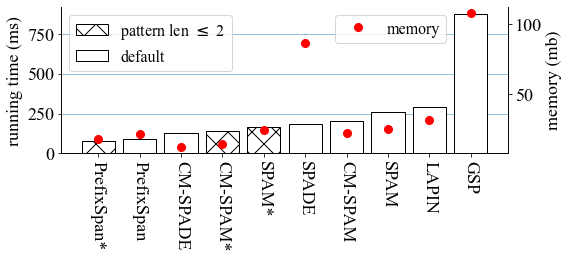

In [87]:
fig = plt.figure(figsize=(8, 2.7))
ax = fig.add_subplot(111)

legend_prop = dict(size=16)

for i, row in df.iterrows():    
    if row['name'].endswith("*"):
        hatch = "x"
        label = "pattern len $\leq$ 2"
    else:
        hatch = ""
        label = "default"
    kwargs = dict(zorder=200, hatch=hatch, edgecolor='k', color='w', label="" if i > 1 else label)
    ax.bar(row['name'], row['totalTime'], **kwargs)
# ax.plot(df['name'], df['totalTime'], marker="o", ls='')
# plt.xticks(rotation = -45);
ax.tick_params(axis='x', labelrotation = -90)
ax.set_ylabel("running time (ms)")
ax.grid(c='#77b1d1', axis='y')
ax.legend(loc="upper left", bbox_to_anchor=(0, 1), prop=legend_prop)


ax2 = ax.twinx()
# ax2.grid(c='#ff848f', axis='y')
ax2.plot(df['name'], df['memory'], marker="o", ls='', c='r', ms=8, zorder=110, label="memory")
ax2.set_ylabel("memory (mb)")
ax2.legend(loc="upper right", bbox_to_anchor=(0.88, 1), prop=legend_prop)
# plt.subplots_adjust(bottom=0)
plt.savefig(os.path.join(current_dir, 'spmf.eps'), bbox_inches = 'tight')

In [7]:
Spmf("PrefixSpan", arguments=[0., 2], **kwargs).run()

In [8]:
# https://www.philippe-fournier-viger.com/spmf/FAST.php
Spmf("Fast", arguments=[0.], **kwargs).run()

>/home/user/dds/netscope/analysis/spmf.jar
An error while trying to run the algorithm. 
 ERROR MESSAGE = java.lang.IllegalArgumentException: 

 The 2nd parameter of this algorithm 'Maxsup (%)' is mandatory. Please provide a value of type: Float.



TypeError: java.lang.IllegalArgumentException